In [1]:
# Import packages
import os

import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import numpy as np
import math
import seaborn as sns

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))
# Define path to file
plot_centroid_path = os.path.join("GRanD_Version_1_3", "GRanD_dams_v1_3.shp")

In [2]:
# Import shapefile using geopandas
grand_plot_locations = gpd.read_file(plot_centroid_path)
# View top 6 rows of attribute table

# grand_hydro_dams = []
# row = 7319
# x = 0
# for row in grand_plot_locations:
#     if x == 7319:
#         grand_hydro_dams
#     elif grand_plot_locations.iloc[x]["MAIN_USE"] == "Hydroelectricity":
#         grand_hydro_dams.append(grand_plot_locations.iloc[x])
#     x += 1
# View the geometry type of each row
grand_plot_locations
# Plot points
# grand_plot_locations.plot()
# grand_hydro_dams = grand_plot_locations[["MAIN_USE"]]
# grand_hydro_dams


,GRAND_ID,RES_NAME,DAM_NAME,ALT_NAME,RIVER,ALT_RIVER,MAIN_BASIN,SUB_BASIN,NEAR_CITY,ALT_CITY,...,MULTI_DAMS,TIMELINE,COMMENTS,URL,QUALITY,EDITOR,LONG_DD,LAT_DD,POLY_SRC,geometry
0,1,None,Terror Lake,None,Terror River,Marmont Bay,None,None,None,None,...,None,None,None,http://www.ferc.gov/industries/hydropower/safe...,3: Fair,UNH,-153.026649,57.651485,NHD,POINT (-153.02665 57.65149)
1,2,None,Mayo,None,Mayo,None,None,None,Whitehorse,None,...,None,None,This dam is on Mayo Lake to control the releas...,http://www.yukon-news.com/opinions/columns/12540/,1: Verified,McGill-BL,-135.367048,63.774184,CanVec,POINT (-135.36705 63.77418)
2,3,None,Blue Lake,None,Sawmill Creek,None,None,None,None,None,...,None,None,None,http://www.ferc.gov/industries/hydropower/safe...,2: Good,UNH,-135.200305,57.062136,NHD,POINT (-135.20030 57.06214)
3,4,None,Green Lake,None,Vodopad River,None,None,None,None,None,...,None,None,None,http://www.ferc.gov/industries/hydropower/safe...,2: Good,UNH,-135.112812,56.986785,NHD,POINT (-135.11281 56.98679)
4,5,Long Lake,Long Lake Dam,Snettisham Dam,Long River,None,None,None,None,None,...,None,None,None,http://www.dnr.state.ak.us/mlw/water/dams/,4: Poor,UNH,-133.728413,58.168750,NHD,POINT (-133.72841 58.16875)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7315,7316,Sardis Lake,Sardis Lake,Sardis Lake,Jackfork Creek,None,Atchafalaya River,None,Clayton,None,...,None,None,None,https://en.wikipedia.org/wiki/Sardis_Lake_(Okl...,2: Good,McGill-PB,-95.350711,34.629812,JRC,POINT (-95.35071 34.62981)
7316,7317,Tims Ford Lake,Tims Ford,Tims Ford Lake,Elk River,None,Mississippi,None,Fayetteville,None,...,None,None,None,https://en.wikipedia.org/wiki/Tims_Ford_Lake,2: Good,McGill-PB,-86.276254,35.197234,JRC,POINT (-86.27625 35.19723)
7317,7318,Cordell Hull Lake,Cordell Hull Dam,Cordell Hull Lake,Cumberland River,None,Mississippi,None,Carthage,None,...,None,None,None,https://en.wikipedia.org/wiki/Cordell_Hull_Lake,2: Good,McGill-PB,-85.944131,36.292220,JRC,POINT (-85.94413 36.29222)
7318,7319,None,Merwin,Ariel Dam,Lewis River,None,Columbia,None,Woodland,None,...,None,None,None,https://en.wikipedia.org/wiki/Merwin_Dam,2: Good,McGill-PB,-122.555376,45.957492,JRC,POINT (-122.55538 45.95749)


In [3]:
# grand_hydro_dams

In [4]:
river_path = et.data.get_data(url="https://ndownloader.figshare.com/files/23273213")
river_path

'C:\\Users\\bpink\\earth-analytics\\data\\earthpy-downloads\\DOR_Binned'

In [5]:
rivers = gpd.read_file(river_path)

In [6]:
for col in rivers.columns:
    print(col)

GOID
NOID
NUOID
NDOID
REACH_ID
SOURCE
SINK
LENGTH_KM
LENGTH_DOW
UPLAND_SKM
RIV_ORD
RIV_CLASS
DIS_AV_CMS
WIDTH_M
DEPTH_M
VOLUME_TCM
HYFALL
INC
CON_ID
CONTINENT
ISO
ISO_NAME
PAC
BAS_ID
BAS_NAME
BB_ID
BB_NAME
BB_ORD
BB_DIS_ORD
BB_OCEAN
BB_LEN_KM
BB_VOL_TCM
BB_DRY_PCT
SED_YLD_TO
DOF
DOR
SED
USE
URB
RDD
FLD
DOF_PLA
DOR_PLA
SED_PLA
CSI_EXI
CSI_PLA
CSI_DIF
STA_EXI
STA_PLA
STA_DIF
Shape_Leng
geometry


Index(['GOID', 'NOID', 'NUOID', 'NDOID', 'REACH_ID', 'SOURCE', 'SINK',
       'LENGTH_KM', 'LENGTH_DOW', 'UPLAND_SKM', 'RIV_ORD', 'RIV_CLASS',
       'DIS_AV_CMS', 'WIDTH_M', 'DEPTH_M', 'VOLUME_TCM', 'HYFALL', 'INC',
       'CON_ID', 'CONTINENT', 'ISO', 'ISO_NAME', 'PAC', 'BAS_ID', 'BAS_NAME',
       'BB_ID', 'BB_NAME', 'BB_ORD', 'BB_DIS_ORD', 'BB_OCEAN', 'BB_LEN_KM',
       'BB_VOL_TCM', 'BB_DRY_PCT', 'SED_YLD_TO', 'DOF', 'DOR', 'SED', 'USE',
       'URB', 'RDD', 'FLD', 'DOF_PLA', 'DOR_PLA', 'SED_PLA', 'CSI_EXI',
       'CSI_PLA', 'CSI_DIF', 'STA_EXI', 'STA_PLA', 'STA_DIF', 'Shape_Leng',
       'geometry'],
      dtype='object')

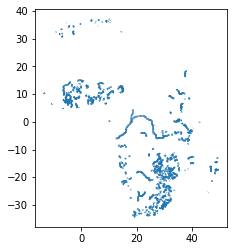

In [7]:
rivers["CONTINENT"]
rivers.loc[rivers['CONTINENT'] == "Africa"].plot()
rivers.columns

In [8]:
rivers['RIV_ORD'].value_counts()

5    38080
6    25833
4    22443
3     8590
7     3833
2     2334
1      303
Name: RIV_ORD, dtype: int64

In [9]:
grand_plot_locations['COUNTRY'].unique()

array(['United States', 'Canada', 'Mexico', 'Guatemala', 'Cuba',
       'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Colombia',
       'Panama', 'Ecuador', 'Peru', 'Dominican Republic', 'France',
       'Venezuela', 'Brazil', 'Bolivia', 'Argentina', 'Chile',
       'French Guiana', 'Suriname', 'Paraguay', 'Uruguay', 'Iceland',
       'Senegal', 'United Kingdom', 'Ireland', 'Spain', 'Portugal',
       'Morocco', 'Algeria', 'Mauritania', 'Burkina Faso', 'Mali',
       'Ghana', 'Guinea', 'Ivory Coast', 'Sierra Leone', 'Liberia',
       'Norway', 'Sweden', 'Germany', 'Netherlands', 'Czech Republic',
       'Belgium', 'Luxembourg', 'Austria', 'Switzerland', 'Italy',
       'Croatia', 'Tunisia', 'Libya', 'Nigeria', 'Togo', 'Cameroon',
       'Benin', 'Gabon', 'Angola', 'Namibia', 'Finland', 'Latvia',
       'Lithuania', 'Belarus', 'Poland', 'Slovakia', 'Ukraine', 'Hungary',
       'Romania', 'Moldova', 'Slovenia', 'Bosnia and Herzegovina',
       'Serbia', 'Bulgaria', 'Montenegro',

In [10]:
grand_plot_locations
global_dams = grand_plot_locations[['GRAND_ID', 'COUNTRY', 'MAIN_USE', 'CATCH_SKM']]
global_dams

,GRAND_ID,COUNTRY,MAIN_USE,CATCH_SKM
0,1,United States,Hydroelectricity,41
1,2,Canada,Hydroelectricity,1174
2,3,United States,Hydroelectricity,97
3,4,United States,Hydroelectricity,81
4,5,United States,Hydroelectricity,79
...,...,...,...,...
7315,7316,United States,Flood control,712
7316,7317,United States,Flood control,1376
7317,7318,United States,Hydroelectricity,20894
7318,7319,United States,Hydroelectricity,1899


In [74]:
# workflow for splitting dams by continent in separate df

# Create list of countries in each continent
africa_country = ['Algeria','Angola','Benin','Botswana','Burkina Faso','Cameroon','Congo','Congo (DRC)',
           'Egypt','Eritrea','Ethiopia','Gabon','Ghana','Guinea','Ivory Coast','Kenya','Lesotho','Liberia','Libya',
           'Madagascar','Mali','Mauritania','Morocco','Mozambique','Namibia','Nigeria',
           'Senegal','Sierra Leone','South Africa','Sudan','Swaziland','Tanzania','Togo','Tunisia',
           'Uganda','Zambia','Zimbabwe']

asia_country = ['Afghanistan', 'Bahrain', "Bangladesh", "Bhutan", "Brunei",'Myanmar (Burma)', 'Myanmar', 'Cambodia', 'China', 'East Timor',
                'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'North Korea', 'South Korea', 'Kuwait', 'Kyrgyzstan', 
                'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia',
                'Singapore', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 
                'Vietnam', 'Yemen']

europe_country = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
                  'Bosnia', 'Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
                  'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 
                  'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
                  'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
                  'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
                  'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City']

namerica_country = ['Antigua', 'Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 
                    'Cuba', 'Dominica', 'Congo (DRC)', ' Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 
                    'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts', 'Nevis',
                    'Saint Lucia', 'Saint Vincent', 'Grenadines', 'Trinidad', 'Tobago', 'United States']

samerica_country = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 
                    'Peru', 'Suriname', 'Uruguay', 'Venezuela']

oceania_country = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand',
                   'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

# Select for dams by continent to new df
dam_africa = global_dams[global_dams['COUNTRY'].isin(africa_country)]
dam_asia = global_dams[global_dams['COUNTRY'].isin(asia_country)]
dam_europe = global_dams[global_dams['COUNTRY'].isin(europe_country)]
dam_namerica = global_dams[global_dams['COUNTRY'].isin(namerica_country)]
dam_samerica = global_dams[global_dams['COUNTRY'].isin(samerica_country)]
dam_oceania = global_dams[global_dams['COUNTRY'].isin(oceania_country)]

dam_africa2 = dam_africa
dam_africa["MAIN_USE"]
dam_africa

,GRAND_ID,COUNTRY,MAIN_USE,CATCH_SKM
2554,2555,Senegal,Irrigation,440416
2927,2928,Morocco,Irrigation,67
2928,2929,Morocco,Water supply,190
2929,2930,Morocco,Irrigation,39
2930,2931,Morocco,Water supply,111
...,...,...,...,...
7148,7149,Morocco,Irrigation,2609
7149,7150,Morocco,Irrigation,3408
7150,7151,Morocco,Water supply,1552
7211,7212,Zimbabwe,Irrigation,5207


In [75]:
# Add use rows to continent df as needed
Fisheries = {'MAIN_USE': "Fisheries"}
Navigation = {'MAIN_USE': "Navigation"}
Recreation = {'MAIN_USE': "Recreation"}
Other = {'MAIN_USE': "Other"}

dam_africa = dam_africa.append(Fisheries, ignore_index = True)
dam_africa = dam_africa.append(Navigation, ignore_index = True)

dam_asia = dam_asia.append(Fisheries, ignore_index = True)
dam_asia = dam_asia.append(Recreation, ignore_index = True)

dam_samerica = dam_samerica.append(Fisheries, ignore_index = True)
dam_samerica = dam_samerica.append(Recreation, ignore_index = True)
dam_samerica = dam_samerica.append(Other, ignore_index = True)

dam_oceania = dam_oceania.append(Fisheries, ignore_index = True)
dam_oceania = dam_oceania.append(Navigation, ignore_index = True)


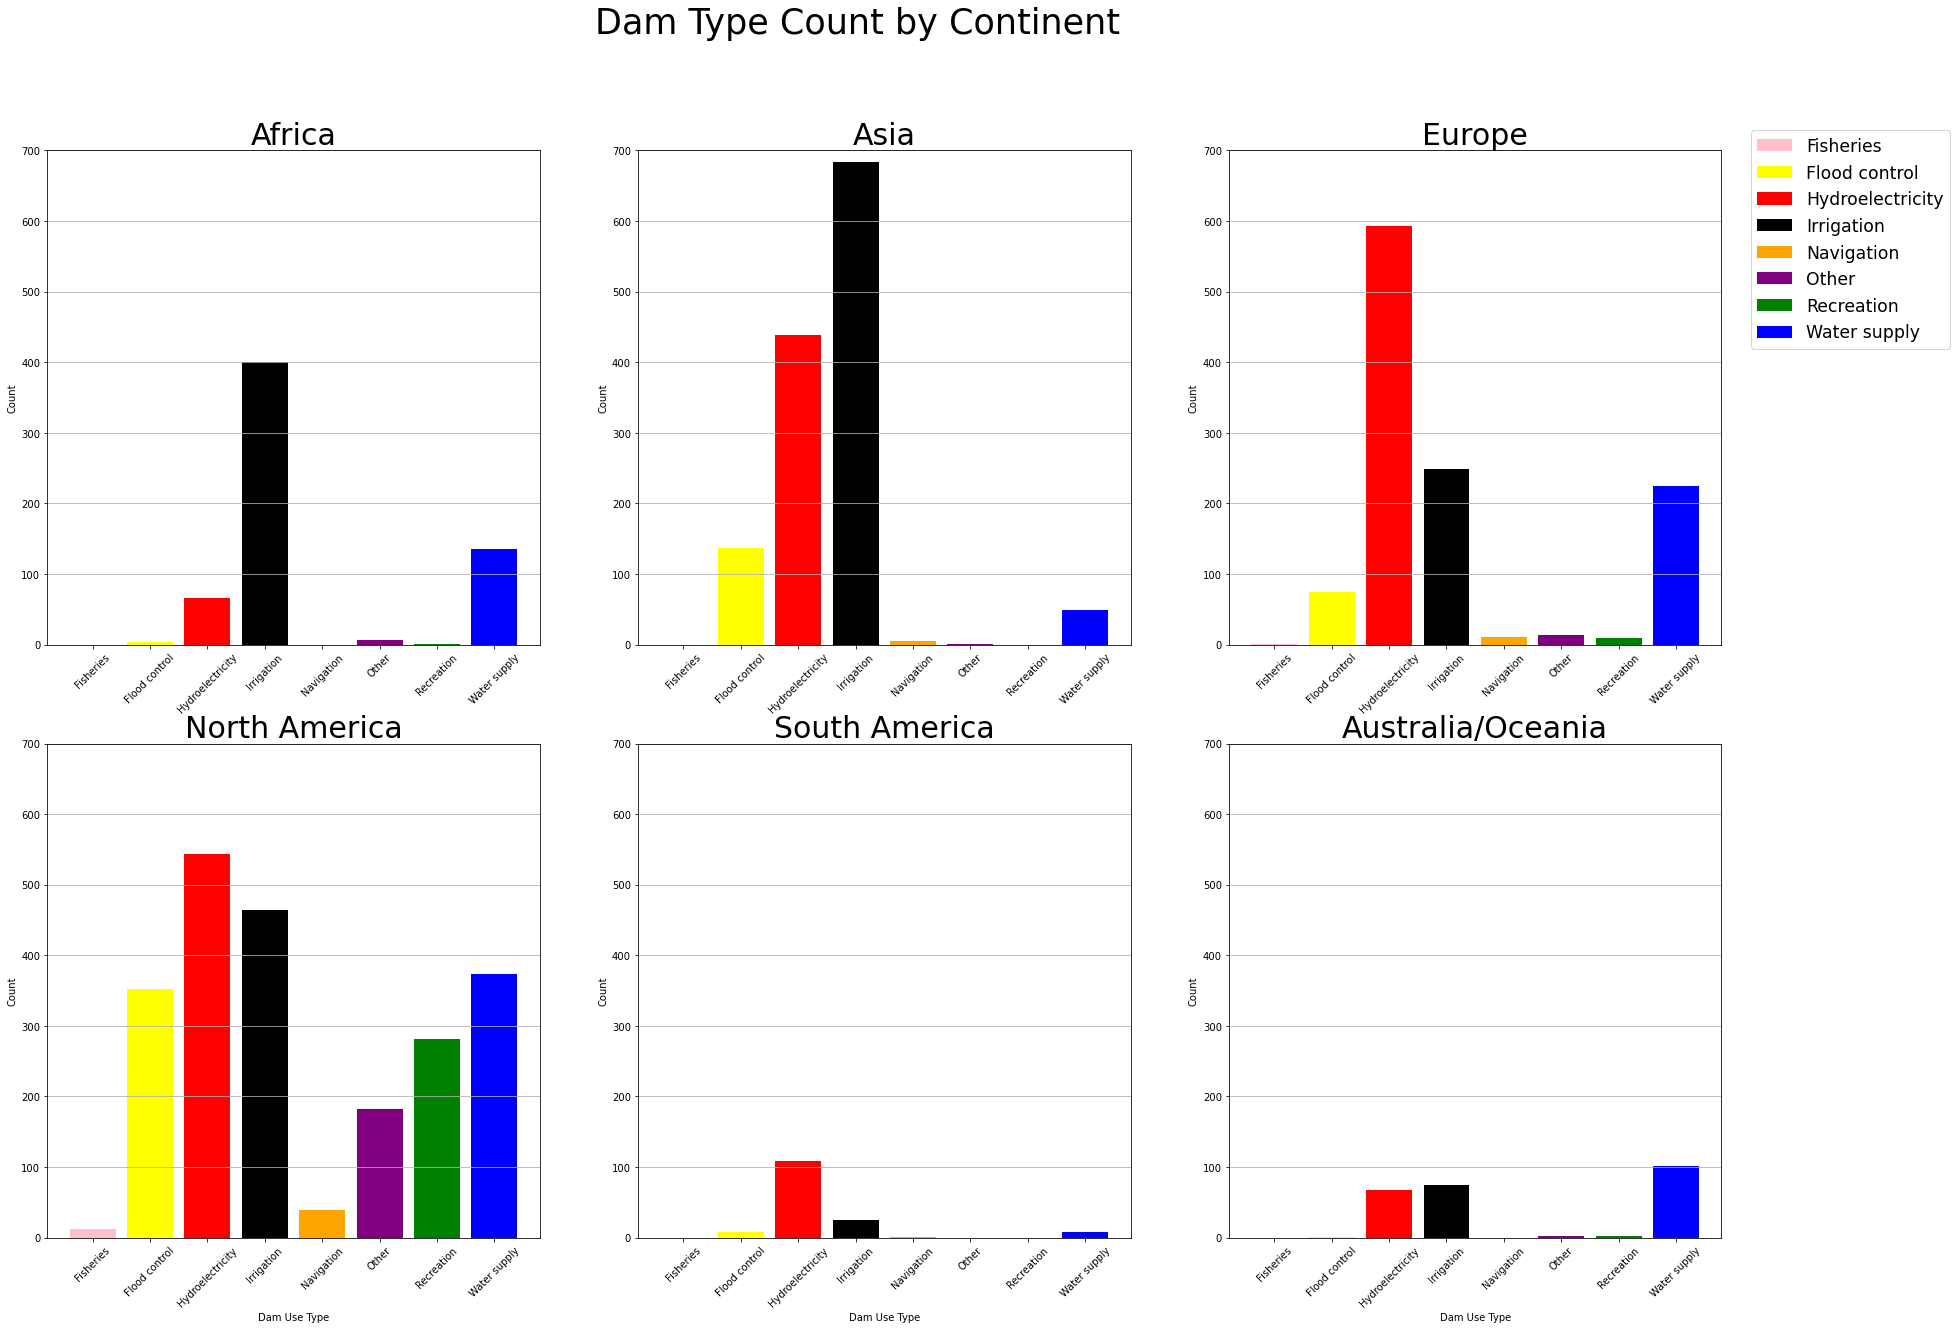

In [113]:
import matplotlib.ticker as ticker

dam_color = {'Irrigation': 'black',
            'Hydroelectricity': 'red',
            'Water supply': 'blue',
            'Flood control': 'yellow',
            'Recreation': 'green',
            'Other': 'purple',
            'Navigation': 'orange',
            'Fisheries': 'pink',
            'Unknown': 'magenta'}

# Plot the data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(30, 20))
fig.suptitle("Dam Type Count by Continent", fontsize = 35)

xtype = {'Irrigation', 'Hydroelectricity', 'Water supply', 'Flood control', 'Recreation', 'Other', 'Fisheries', 'Navigation'}
for ctype, dam in dam_africa.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax1.bar(ctype,
        dam_count["GRAND_ID"],
        color = color_dam,
          label=label)
    ax1.set_ylim(0,700)

    ax1.set(ylabel = "Count")
    ax1.set_ylim(0,700)
    ax1.set_title('Africa', fontsize=30)
ax1.grid(axis="y")
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

for ctype, dam in dam_asia.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax2.bar(ctype,
        dam_count["GRAND_ID"],
        color = color_dam,
          label=label)
    ax2.set_ylim(0,700)

    ax2.set(title="Asia", 
            ylabel = "Count")
    ax2.set_title('Asia', fontsize=30)
ax2.grid(axis="y")

for ctype, dam in dam_europe.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax3.bar(ctype,
        dam_count["GRAND_ID"],
        color = color_dam,
          label=label)
    ax3.set_ylim(0,700)

    ax3.set(title="Europe", 
            ylabel = "Count")
    ax3.set_title('Europe', fontsize=30) 
ax3.grid(axis="y")
    
for ctype, dam in dam_namerica.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax4.bar(ctype,
        dam_count["GRAND_ID"],
        color = color_dam,
          label=label)
    
    ax4.set(title="North America",
            xlabel = "Dam Use Type", 
            ylabel = "Count")
    ax4.set_ylim(0,700)
    ax4.set_title('North America', fontsize=30)
ax4.grid(axis="y")
    
for ctype, dam in dam_samerica.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax5.bar(ctype,
        dam_count["GRAND_ID"],
        color = color_dam,
          label=label)
    ax5.set_ylim(0,700)

    ax5.set(title="South America",
            xlabel = "Dam Use Type", 
            ylabel = "Count")
    ax5.set_title('South America', fontsize=30)
ax5.grid(axis="y")
    
for ctype, dam in dam_oceania.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax6.bar(ctype,
        dam_count["GRAND_ID"],
        color = color_dam,
          label=label)
    ax6.set_ylim(0,700)

    ax6.set(title="Australia/Oceania",
            xlabel = "Dam Use Type", 
            ylabel = "Count")
    ax6.set_title('Australia/Oceania', fontsize=30)
ax6.grid(axis="y")
    
plt.setp((ax1.get_xticklabels(), ax2.get_xticklabels(), ax3.get_xticklabels(), ax4.get_xticklabels(), ax5.get_xticklabels(), ax6.get_xticklabels(), ), rotation = 45)
#plt.legend()
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc=1, bbox_to_anchor=(1.01, 0.9), fontsize='xx-large')

plt.show()

In [85]:
# for ctype, dam_africa in dam_africa.groupby("MAIN_USE"):
#     print(ctype)
count_list = list(dam_africa.groupby("MAIN_USE").count().reset_index()["GRAND_ID"])
type(count_list)

for i, v in enumerate(count_list):
    ax1.text(v + 3, i + .25, str(v), 
            color = 'blue', fontweight = 'bold')
    
count_list = list(dam_africa.groupby("MAIN_USE").count().reset_index()["GRAND_ID"])

#     for i, v in enumerate(count_list):
#         ax1.text(v + 3, i + .25, str(v), 
#                 color = 'blue', fontweight = 'bold')

    for index, value in enumerate(count_list):
        plt.text(value, index,
                 str(value))

[0, 4, 66, 401, 0, 7, 1, 135]

In [49]:
ctype

'Water supply'

In [50]:
# fig, ax = plt.subplots(figsize=(10,10))

# for ctype, dam in dam_namerica.groupby("MAIN_USE"):
#     color_dam = dam_color[ctype]
#     label = ctype
#     dam_count = dam.count()
#     ax.bar(ctype,
#         dam_count["GRAND_ID"],
#         color = color_dam,
#           label=label)
#     ax.set_ylim(0,700)
# plt.legend()
# plt.show


In [51]:
# dam_africa.reset_index()
# for ctype, dam_africa in dam_africa.groupby("MAIN_USE"):
#     print(ctype)
# dam_africa2

In [52]:
# dam_africa = grand_plot_locations[grand_plot_locations['COUNTRY'].isin(africa_country)].groupby("MAIN_USE").count().reset_index()
# dam_asia = grand_plot_locations[grand_plot_locations['COUNTRY'].isin(asia_country)].groupby("MAIN_USE").count()
# dam_europe = grand_plot_locations[grand_plot_locations['COUNTRY'].isin(europe_country)].groupby("MAIN_USE").count()
# dam_namerica = grand_plot_locations[grand_plot_locations['COUNTRY'].isin(namerica_country)].groupby("MAIN_USE").count()
# dam_samerica = grand_plot_locations[grand_plot_locations['COUNTRY'].isin(namerica_country)].groupby("MAIN_USE").count()
# dam_oceania = grand_plot_locations[grand_plot_locations['COUNTRY'].isin(namerica_country)].groupby("MAIN_USE").count()

In [53]:
# # LN transform the catchment area
# import pandas as pd
# import seaborn as sns


# dam_africa['ln_CATCH_SKM'] = np.log(dam_africa['CATCH_SKM'])
# dam_africa = dam_africa.sort_values('MAIN_USE')
# dam_color = {'Irrigation': 'black',
#             'Hydroelectricity': 'red',
#             'Water supply': 'blue',
#             'Flood control': 'yellow',
#             'Recreation': 'green',
#             'Other': 'purple',
#             'Navigation': 'orange',
#             'Fisheries': 'pink',
#             'Unknown': 'magenta'}
# # color_dict = dict(zip(use, use_colors))
# # for i in range(0,7):
# #     mybox = ax2.artists[i]
# #     mybox.set_facecolor(color_dict[use[i]])

# fig2, ax2 = plt.subplots()
# # ax2 = sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM", data=dam_africa, palette=color_wheel)
# # ax2.xaxis.set_tick_params(rotation=45)
# # ax2.set(title="Boxplot Natural Log Catchment Area by Dam Type \n in Africa",
# #        xlabel="Dam type",
# #        ylabel="Catchment area sqkm (ln)")

# ax2 = sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM", data=dam_africa, palette= dam_color)
# ax2.xaxis.set_tick_params(rotation=45)
# ax2.set(title="Global Boxplot Natural Log Catchment Area by Dam Type",
#        xlabel="Dam type",
#        ylabel="Catchment area sqkm (ln)")
# plt.show()

C:\Users\bpink\miniconda3\envs\earth-analytics-python\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bpink\miniconda3\envs\earth-analytics-python\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


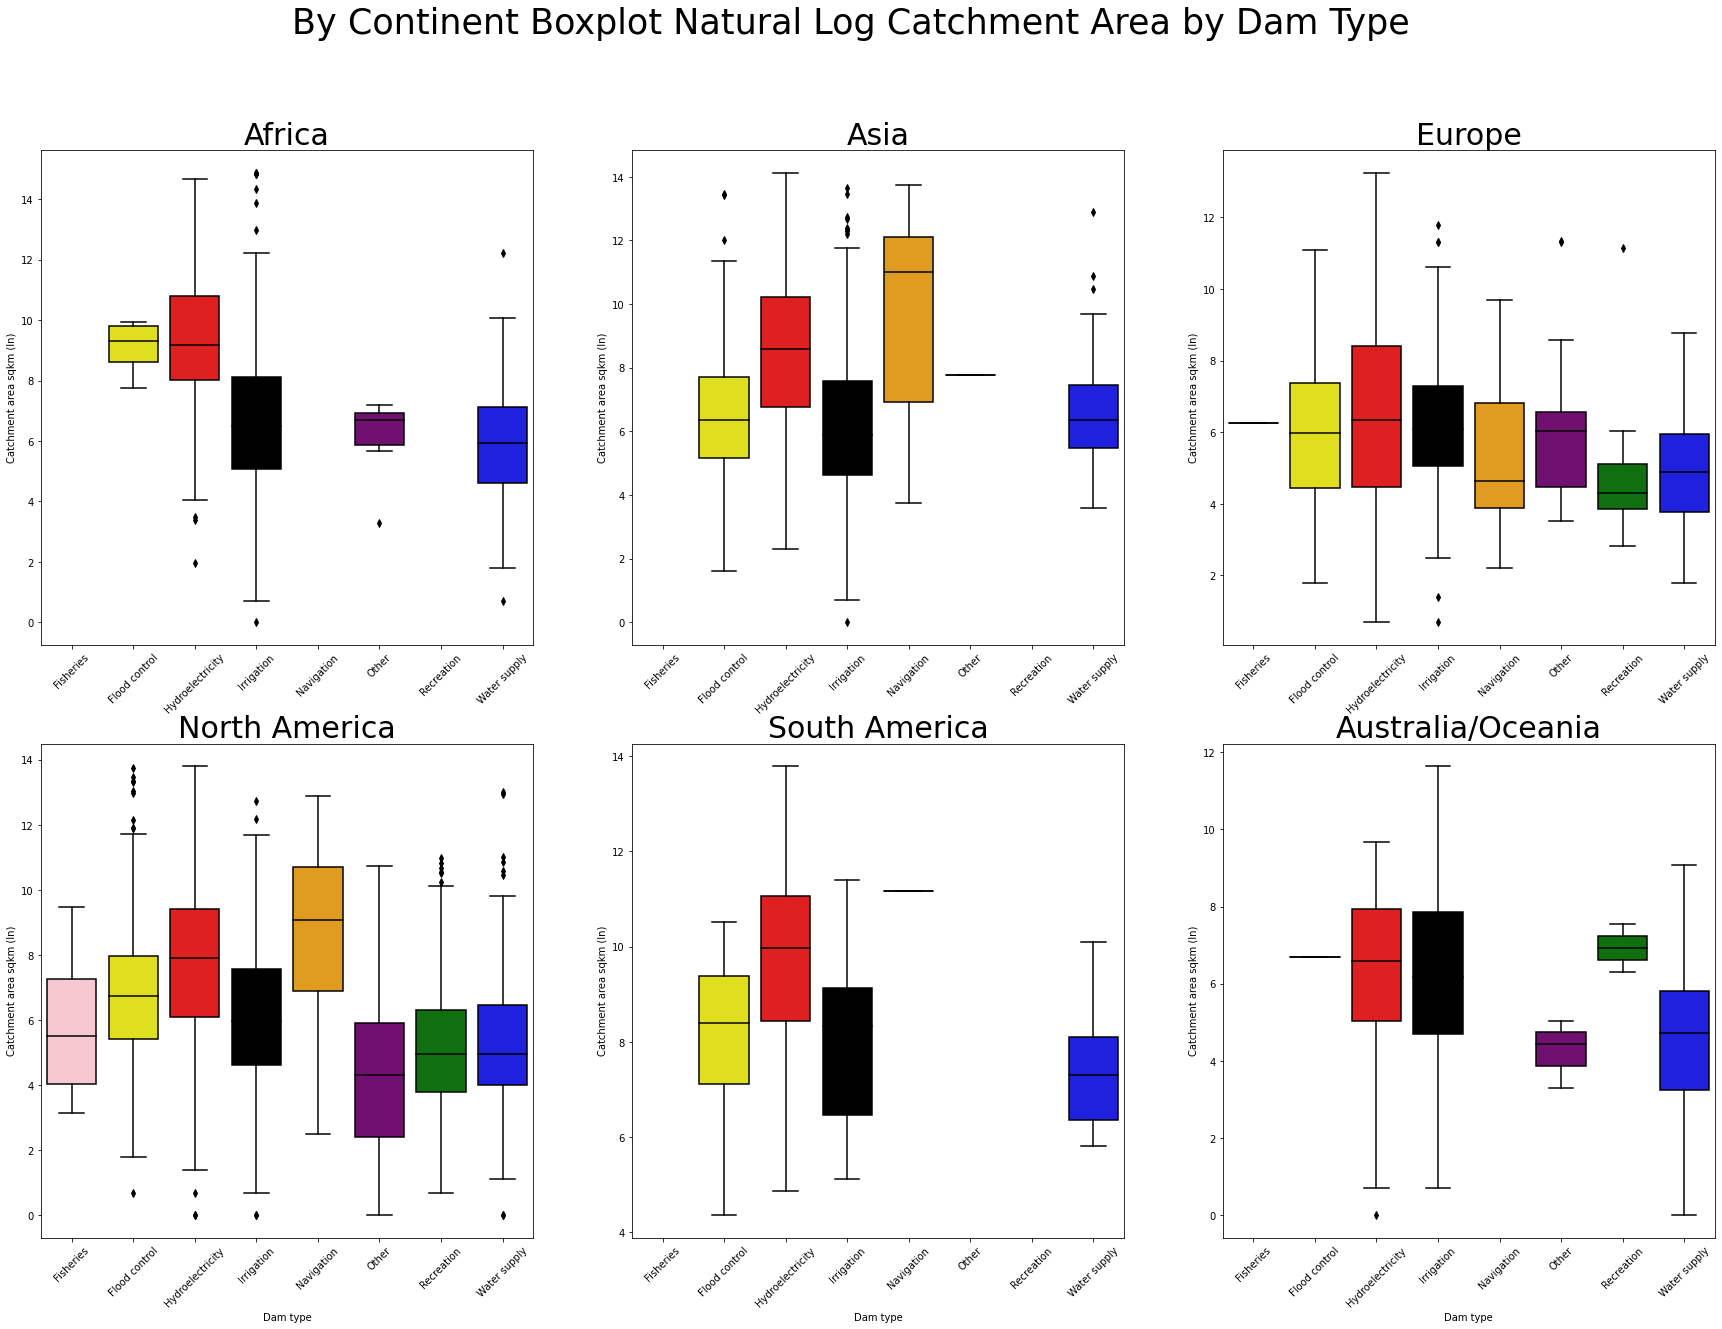

In [95]:
# Processing for all df for boxplots

dam_africa['ln_CATCH_SKM'] = np.log(dam_africa['CATCH_SKM'])
dam_africa = dam_africa.sort_values('MAIN_USE')

dam_asia['ln_CATCH_SKM'] = np.log(dam_asia['CATCH_SKM'])
dam_asia = dam_asia.sort_values('MAIN_USE')

dam_europe['ln_CATCH_SKM'] = np.log(dam_europe['CATCH_SKM'])
dam_europe = dam_europe.sort_values('MAIN_USE')

dam_namerica['ln_CATCH_SKM'] = np.log(dam_namerica['CATCH_SKM'])
dam_namerica = dam_namerica.sort_values('MAIN_USE')

dam_samerica['ln_CATCH_SKM'] = np.log(dam_samerica['CATCH_SKM'])
dam_samerica = dam_samerica.sort_values('MAIN_USE')

dam_oceania['ln_CATCH_SKM'] = np.log(dam_oceania['CATCH_SKM'])
dam_oceania = dam_oceania.sort_values('MAIN_USE')

# Colors
dam_color = {'Irrigation': 'black',
            'Hydroelectricity': 'red',
            'Water supply': 'blue',
            'Flood control': 'yellow',
            'Recreation': 'green',
            'Other': 'purple',
            'Navigation': 'orange',
            'Fisheries': 'pink',
            'Unknown': 'magenta'}

# Create boxplot supfig
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(30, 20))
fig.suptitle("By Continent Boxplot Natural Log Catchment Area by Dam Type", fontsize = 35)

# Create plots
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM", data=dam_africa, palette= dam_color, ax=ax1)
ax1.xaxis.set_tick_params(rotation=45)
ax1.set(xlabel="", ylabel="Catchment area sqkm (ln)")
ax1.set_title('Africa', fontsize=30)

sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM", data=dam_asia, palette= dam_color, ax=ax2)
ax2.xaxis.set_tick_params(rotation=45)
ax2.set(xlabel="", ylabel="Catchment area sqkm (ln)")
ax2.set_title('Asia', fontsize=30)

sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM", data=dam_europe, palette= dam_color, ax=ax3)
ax3.xaxis.set_tick_params(rotation=45)
ax3.set(xlabel="", ylabel="Catchment area sqkm (ln)")
ax3.set_title('Europe', fontsize=30)

sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM", data=dam_namerica, palette= dam_color, ax=ax4)
ax4.xaxis.set_tick_params(rotation=45)
ax4.set(xlabel="Dam type",
       ylabel="Catchment area sqkm (ln)")
ax4.set_title('North America', fontsize=30)

sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM", data=dam_samerica, palette= dam_color, ax=ax5)
ax5.xaxis.set_tick_params(rotation=45)
ax5.set(xlabel="Dam type",
       ylabel="Catchment area sqkm (ln)")
ax5.set_title('South America', fontsize=30)

sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM", data=dam_oceania, palette= dam_color, ax=ax6)
ax6.xaxis.set_tick_params(rotation=45)
ax6.set(xlabel="Dam type",
       ylabel="Catchment area sqkm (ln)")
ax6.set_title('Australia/Oceania', fontsize=30)


plt.show()